In [1]:
cd G:\dd-resource\slides\homework\ML\HW2

G:\dd-resource\slides\homework\ML\HW2


# This is an implemetation of stochastic gradient_descent with one variable.

avr_price is:  2.13431437673
m is:  804
Max interactions exceeded!
theta0 is:  2.5053046766642706 and theta1 is:  -0.17997775126561977  and the loss error is:  0.478076401069  and the R-square is:  0.0202226561826


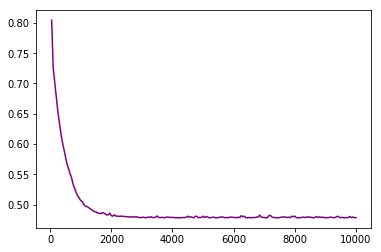

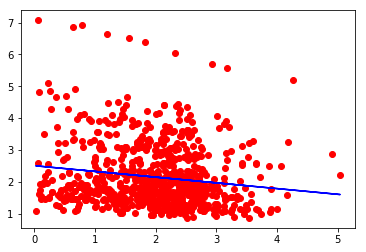

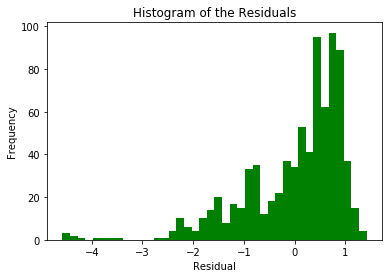

In [2]:
import pylab
import xlrd
from pylab import *
import matplotlib.pyplot as plt


# this is the code for problem 3-1, only one variant -- mileage is consider.


def stochastic_gradient_descent(alpha, x, y, accurancy, max_iter):
    converged = False
    iter = 0
    m = len(x)  # number of samples

    print("m is: ", m)

    # init the theta [t0, t1] and loss
    t0 = np.random.random()
    t1 = np.random.random()
    J = sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)])

    # get the random samples set: ll
    ll = []
    for i in range(m):
        ll.append(i)

    nn = np.asarray(ll)

    # Jset is storaged for plot the convergence graph: y-axis
    Jset = []
    itertimes = []
    Jinit = 0

    while not converged:
        np.random.shuffle(nn)

        batch = 10  # set batch size of batch-SGD
        grad0 = 0
        grad1 = 0

        # calculate the gradient in |batch| samples
        for i in range(batch):
            j = nn[i]
            grad0 += (t0 + t1 * x[j] - y[j])
            grad1 += (t0 + t1 * x[j] - y[j]) * x[j]

        t0 = t0 - alpha * (grad0 / batch)  # update the theta
        t1 = t1 - alpha * (grad1 / batch)

        #  new loss in a new iteration
        e = 0.5 * sum([(t0 + t1 * x[i] - y[i]) ** 2 for i in range(m)]) / m

        if abs(J - e) <= accurancy:
            print("Converged, iterations: ", iter, "!!!")
            converged = True

        J = e  # update error
        Jinit = Jinit + J
        base = 50

        iter += 1  # update iter

        # store a value of average loss in every |base| losses into Jset to get convergence graph. Here |base|=50. Jset --> y-axis
        if (iter % base == 0):
            Jset.append(Jinit / base)
            itertimes.append(iter)
            Jinit = 0

        if iter == max_iter:
            print("Max interactions exceeded!")
            converged = True

    figure(1)
    pylab.plot(itertimes, Jset, 'k-', color='purple')  # return convergence graph
    return t0, t1, J


# read price and mileage from file
def read_excel(index):
    ExcelFile = xlrd.open_workbook(r'G:\dd-resource\slides\homework\ML_project\HW2\car_data.xls')
    sheet = ExcelFile.sheet_by_index(0)
    ncols = sheet.ncols
    nrows = sheet.nrows
    data = []
    for i in range(ncols):
        arr = []
        if (i == 0 or i == 1):
            arr = np.asarray(sheet.col_values(i)[1:nrows]) / 10000
            data.append(arr.tolist())
        else:
            data.append(sheet.col_values(i)[1:nrows])

    return data[index]


if __name__ == '__main__':
    price = read_excel(0)
    mileage = read_excel(1)
    avr_price = sum([price[i] for i in range(len(price))]) / len(price)
    print("avr_price is: ", avr_price)
    alpha = 0.01  # learning rate
    accurancy = 1e-10  # convergence criteria
    theta0, theta1, error = stochastic_gradient_descent(alpha, mileage, price, accurancy, max_iter=10000)
    res = []

    for i in range(len(mileage)):
        y_predict = theta0 + theta1 * np.asarray(mileage)

    # calculate R-square
    SSE = sum([(y_predict[i] - price[i]) ** 2 for i in range(len(price))]) / len(price)
    SST = sum([(avr_price - price[i]) ** 2 for i in range(len(price))]) / len(price)
    RS = 1 - SSE / SST

    print("theta0 is: ", theta0, "and theta1 is: ", theta1, " and the loss error is: ", error, " and the R-square is: ",
          RS)
    # print fitted curve
    figure(2)
    pylab.plot(mileage, price, 'o', color='red')
    pylab.plot(mileage, y_predict, 'k-', color='blue')

    # print histogram of the residuals
    res = y_predict - price
    figure(3)
    plt.hist(res, 40, color='green')
    plt.ylabel('Frequency')
    plt.xlabel('Residual')
    plt.title('Histogram of the Residuals')

    figure(1)
    savefig('fig1')
    figure(2)
    savefig('fig2')
    figure(3)
    savefig('fig3')
    pylab.show()
